In [39]:
# Imports
import os
import numpy as np

import pyBigWig

import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
def plot_tracks(tracks, interval, height=1.5, colors=None):
  fig, axes = plt.subplots(len(tracks), 1, figsize=(20, height * len(tracks)), sharex=True)
  for ax, (title, y) in zip(axes, tracks.items()):
    if colors is not None:
      ax.fill_between(np.linspace(interval["start"], interval["end"], num=len(y)), y, color=colors[title])
    else:
      ax.fill_between(np.linspace(interval["start"], interval["end"], num=len(y)), y)
    ax.set_title(title)
    sns.despine(top=True, right=True, bottom=True)
  ax.set_xlabel(f"{interval['chrom']}:{interval['start']}-{interval['end']}")
  plt.tight_layout()

In [33]:
# Paths
data_dir = "/cellar/users/aklie/data/datasets/ENCODE_ATAC-seq/processed/2023_12_30"
fasta = "/cellar/users/aklie/data/ref/genomes/hg38/hg38.fa"

In [34]:
# TODO: change to your paths
count_signal = os.path.join(data_dir, "_unstranded.bw")
fe_signal = os.path.join(data_dir, "ENCFF062JUV.bigWig")
p_signal = os.path.join(data_dir, "ENCFF650GDO.bigWig")
count_signal, fe_signal, p_signal

('/cellar/users/aklie/data/datasets/ENCODE_ATAC-seq/processed/2023_12_30/_unstranded.bw',
 '/cellar/users/aklie/data/datasets/ENCODE_ATAC-seq/processed/2023_12_30/ENCFF062JUV.bigWig',
 '/cellar/users/aklie/data/datasets/ENCODE_ATAC-seq/processed/2023_12_30/ENCFF650GDO.bigWig')

In [35]:
# Plot signal and control
chrom = "chr11"
chromStart = 35_082_742
chromEnd = 35_197_430
interval = dict(chrom=chrom, start=chromStart, end=chromEnd)

In [36]:
# Plot count signal
file = pyBigWig.open(str(count_signal))
count_vals = np.array(file.values(chrom, chromStart, chromEnd))
count_vals = np.nan_to_num(count_vals)
file.close()

# Plot fold enrichment signal 
file = pyBigWig.open(str(fe_signal))
fe_vals = np.array(file.values(chrom, chromStart, chromEnd))
fe_vals = np.nan_to_num(fe_vals)
file.close()

# Plot p-value signal
file = pyBigWig.open(str(p_signal))
p_vals = np.array(file.values(chrom, chromStart, chromEnd))
p_vals = np.nan_to_num(p_vals)
file.close()

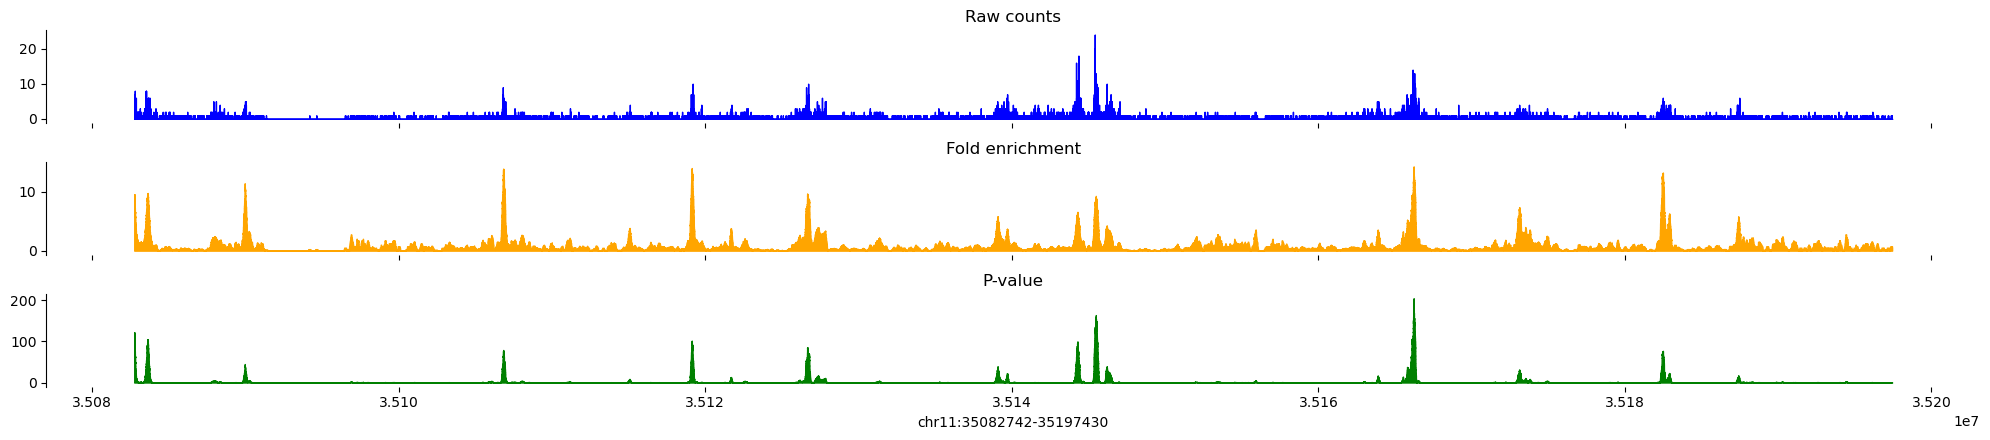

In [38]:
# Plot tracks
plot_tracks({
    "Raw counts": count_vals,
    "Fold enrichment": fe_vals,
    "P-value": p_vals
    }, 
    interval,
    colors={
        "Raw counts": "blue",
        "Fold enrichment": "orange",
        "P-value": "green"
    }
)

# DONE!

---